# Tutorial Exercises

In these exercises you will practice:
* Creating plots with Python
* Choosing appropriate plots for the question at hand
* Tweaking plots to make clear the important features of the data
* Adding comments that make the interpretation of plots clear

We will use some of the example datasets provided with `Seaborn`

In [1]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns
sns.set_theme(style='white')
import statsmodels.api as sm
import statsmodels.formula.api as smf
sns.set_palette("coolwarm",2)

## 1. Titanic Data

The Titanic dataset contains information on 891 passengers from the Titanic.

<img src="https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/images/titanic.jpg" width=50% alt="Picture of the Titanic" />


This is actually a popular dataset for people starting out with machine learning - the task is to build a model to predict who survived (you may like to try this yourself after commpleting the session on Logistic Regression after Easter).

For now let's use some plot to look at the factors affecting survival.

The dataset contains the following information on each passenger:

* **survived** 0 = No, 1 = Yes
* **pclass** 	Ticket class -	1 = 1st, 2 = 2nd, 3 = 3rd
* **sex** 	 	
* **age** 	Age in years 	
* **sibsp** 	number of siblings and/or spouses aboard the Titanic 	
* **parch** 	number of parents / children aboard the Titanic 	
* **fare** 	Passenger fare 	
* **embarked** 	Port of Embarkation -	C = Cherbourg, Q = Queenstown, S = Southampton
* **class** Ticket class as a string
* **who**  man, woman or child
* **deck** 	the deck on which they slept 	
* **alive** same as survived, but strings
* **alone**  <tt>True</tt> only if sibsp and parch are zero


In [2]:
# load the data - special syntax here for loading a Seaborn example dataset
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


Let's first have a look at who the passengers were

**a. Were there equal numbers of men and women in each class?**

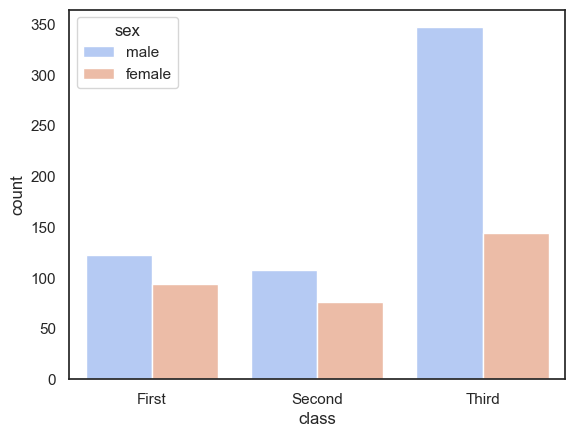

In [3]:
# Your code here
sns.countplot(data=titanic, x='class',hue='sex')
plt.show()

**b. What was the age distribution in each class?**

You could use a violin plot or a histogram here

Which is better and why?

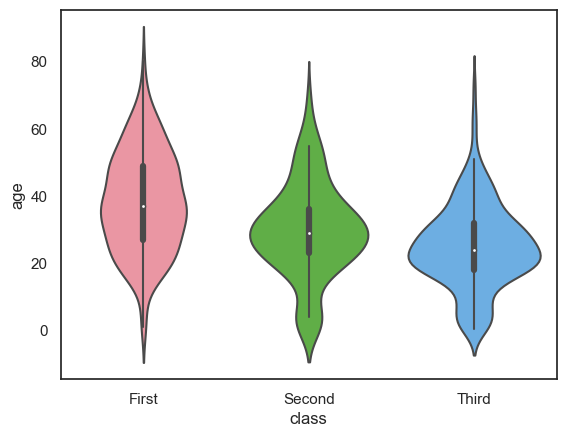

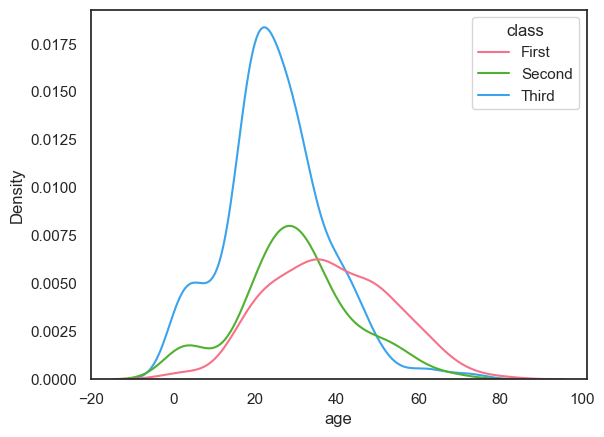

In [4]:
# Your code here
sns.violinplot(data=titanic, x='class', y='age')
plt.show()
# OR
sns.kdeplot(data=titanic, hue='class', x='age')
plt.show()

**Discuss with students:**

Which plot is better? Why?

The violin plot normalizes the area for each group, emphasising differences in the shape of the distribution

The histogram shows the shear nummber of (young) people in third class

If we wanted to further break down the data by sex, which plot type would be better
* I think at this point the histogram would become very croweded whereas a violin plot allows for grouping etc - you could try plotting this with students

**c. Were people in some classes more likely to survive?**


You could use countplot or barplot here. 

Which is better and why?

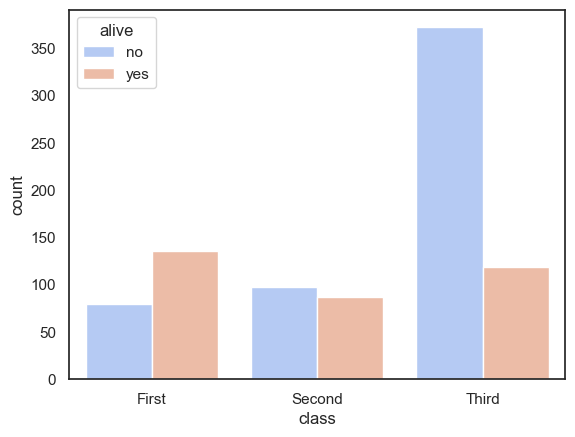

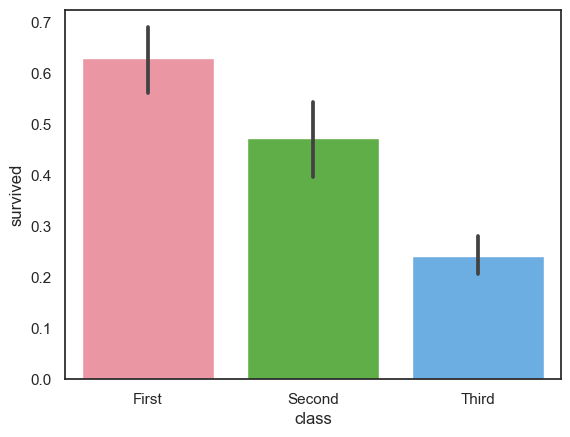

In [5]:
sns.color_palette("coolwarm", as_cmap=True)
sns.countplot(data=titanic, x='class', hue='alive')
plt.show()
# OR
sns.barplot(data=titanic, x='class', y='survived')
plt.show()

**Discuss with students:**
* Which of the above is a better representation of the data?
* What makes it so?

I personally think the count plot is the most striking, showing the huge number of people in third class who died

On the other hand, perhaps it exaggerates the effect as there were more people in thrid class overall; the lower plot showing the proportion who survived takes this into account

You could ask students whether the effect of clas on survival looks bigger in the first or second plot

**d. Were women and children more likely to survive?**


You could use countplot or barplot here. 

Which is better and why?

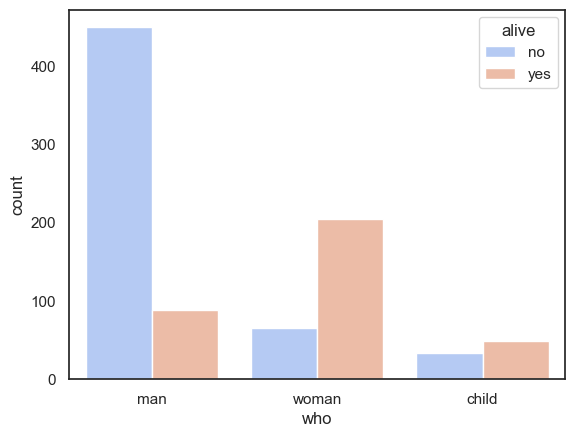

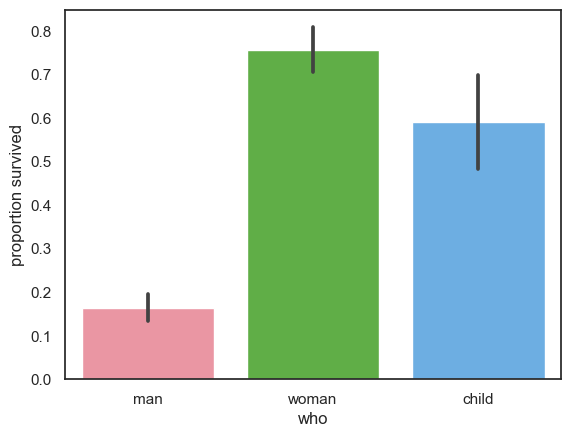

In [6]:
sns.countplot(data=titanic, x='who', hue='alive')
plt.show()
# OR
sns.barplot(data=titanic, x='who', y='survived')
plt.ylabel('proportion survived')
plt.show()

**Discuss with students**

Which of these plots is better? Why?

The difference in survival rates between women and children looks larger in the countplot (we see that 3x as many women survived as died, whereas for children it was roughly equal)

Which plot do you think would be better understood by a person without statistical training
* psychological research shows that people understand actual nubers/counts much better than proportions

**e. Does the answer to d) depend on the ticket class?**

As you are now plotting a barchart with data breoken down by *two* categorical variables, you will need to set one as <tt>x</tt> and one as <tt>hue</tt>. 

Try it both ways and see which you think is better.

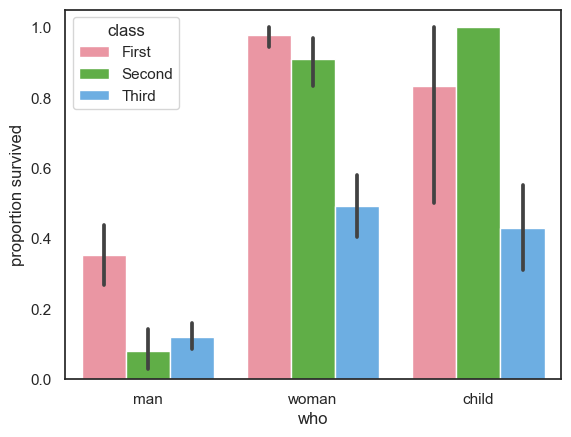

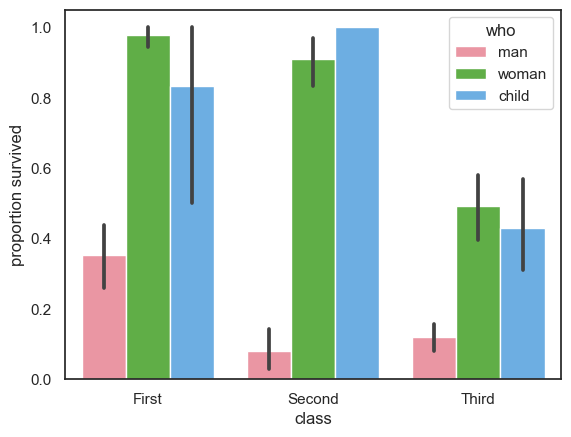

In [7]:
sns.barplot(data=titanic, x='who', y='survived', hue='class')
plt.ylabel('proportion survived')
plt.show()

sns.barplot(data=titanic, x='class', y='survived', hue='who')
plt.ylabel('proportion survived')
plt.show()

**Discuss with students**

Does it matter how the bars are grouped?

## 2. Penguin data

How can we recognise penguins of different species? Let's look at the Palmer Penguins dataset which contains data on penguins from three species (Artwork by @allison_horst):

<img src= "https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/master/images/MT_wk2_penguins.png" width="50%"  />

We can see that they differ in the shape of their bills, and their size.

Let's load th data

In [8]:
penguins = sns.load_dataset('penguins')
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


**a. Are males bigger than females?**

* Plot the mean bodyweight for each sex

* Plot the distribution of bodyweights of each sex

What did we learn by plotting the distribution? Can you make a further plot to explore this discovery?

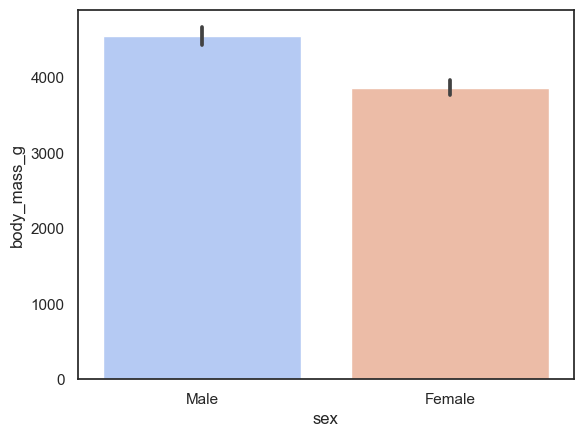

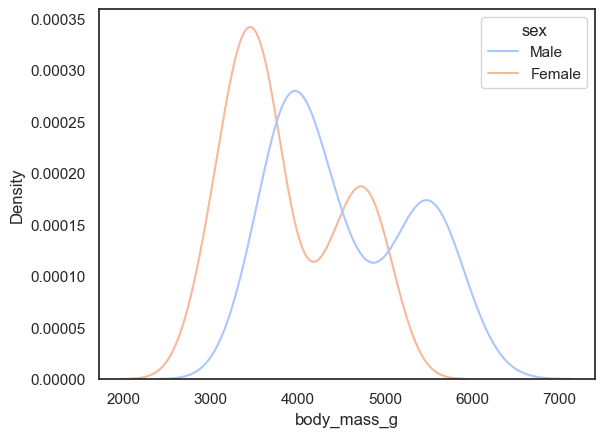

In [9]:
sns.barplot(data=penguins, y="body_mass_g", x='sex')
plt.show()

sns.kdeplot(data=penguins, x="body_mass_g", hue='sex')
plt.show()

**Discuss with students **

What did we learn by plotting the distribution?

* the distribution is bimodal suggesting the data could be further broken down
* most likely one species is heavier accounting for the upper mode
* should we expect sex differences to be the same in all species? How will we find out if they are?

Further plot should show penguin sie broken down by species (and optionally sex, se we can see if sex differences are consistent across species - trying not to loose sight of the original question)

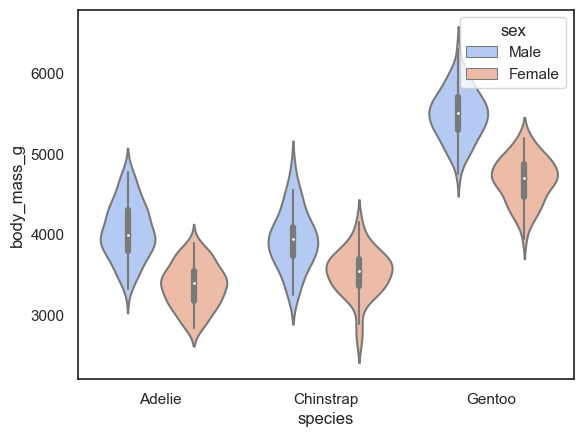

In [10]:
sns.violinplot(data=penguins, x='species', y='body_mass_g', hue='sex')
plt.show()

Looks like 
* All species have a similar sex difference as a proportion of their size
* Indeed one species is larger - Gentoos are the big ones

**b. Is there a correlation between beak length and depth?**

Plot the data in a way that answers this question.

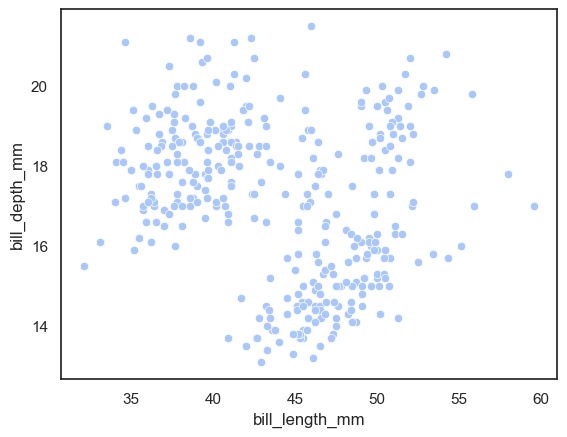

In [11]:
sns.scatterplot(data=penguins, x='bill_length_mm', y='bill_depth_mm')
plt.show()

Do you notice some clusters in the plot? How could they be explained?

Modify your plot using the 'hue' argument to test your hypothesis.

Summarize your findings in plain English.

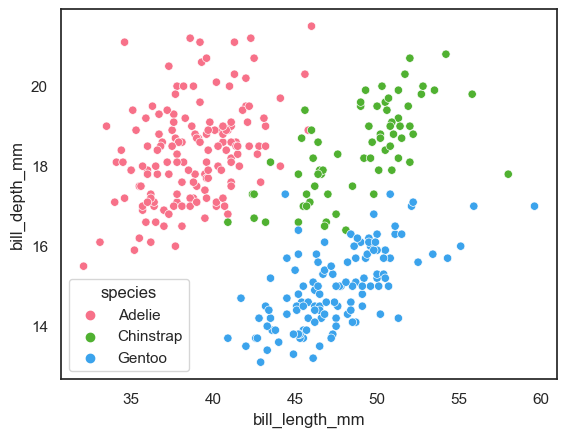

In [12]:
sns.scatterplot(data=penguins, x='bill_length_mm', y='bill_depth_mm', hue='species')
plt.show()

Discuss with students how we can summarize the results in plain English.

* Adelie have short stubby bills
* Gentoo have long thin bills
* Chinstrap have big bills with an intermediate aspect ratio!

## 3. Parietal neurons dataset

I mentioned that Seaborn was built by a neuroscientist, Michael Waskom, and a couple of the example datasets are from neuroscience.

Here we explore the <tt>dots</tt> dataset, from a study by <a href="https://pubmed.ncbi.nlm.nih.gov/12417672/">Roitman and Shadlen (2002)</a>. This study contains firing rates over time from neurons in the parietal cortex of a monkey performing a perceptual decision-making task. 

In the task, the monkey observes a *random dot kinematogram* - a stimulus containing dots that mainly move about at random. A small proportion of dots move **coherently** towards the left or right (or in this case, upwards!). 

<img src="https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/images/MT_wk2_RDKUP.gif" width=25% />

The monkey's task is to indicate the direction in which the dots are moving - instead of pressing a button, the monkey moves its gaze to one of two targets on the screen:

* left = move eyes to target T1
* right = move gaze to target T2

The explanation for this dataset is somewhat involved (although PPL and BMS students will in fact cover this study in lectures after Christmas) but it may be helpful to see the following figure, which is what we are eventually aiming for:

<img src="https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/images/MT_wk2_cells.png" width=75% />

**We are going to try and reproduce this figure**

Let's start by loading the data and plotting the timeseries:

In [13]:
dots = sns.load_dataset('dots') # this syntax only works for the Seaborn example datasets
dots

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487
...,...,...,...,...,...
843,sacc,T2,300,3.2,33.281734
844,sacc,T2,300,6.4,27.583979
845,sacc,T2,300,12.8,28.511530
846,sacc,T2,300,25.6,27.009804


The dataset contains timeseries alligned to two timepoints:
    * stimulus onset (<tt>align == 'dots'</tt>)
    * response onset (<tt>align == 'sacc'</tt>)
    
We are going to split the dataframe and deal with these separately:

In [14]:
dots_stimulus = dots.query('align == "dots"')
dots_response = dots.query('align == "sacc"')

Let's start with the stimulus-locked data.

**a. Plot the timeseries data: firing rate over time**

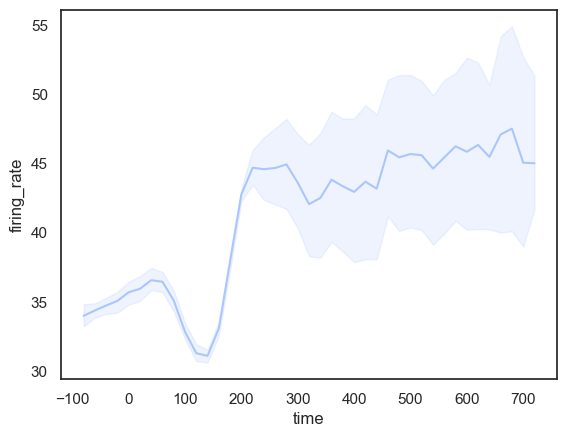

In [15]:
# Your code here
sns.lineplot(data=dots_stimulus, x='time', y='firing_rate')
plt.show()

Time zero is the onset of the moving dots. We can see that firing rate initially dips, then rises over the course of several hundred milliseconds.

* what do your notice about the variability in firing rate?
    * ANSWER: variability is large in the rising phase (200ms onwards)
* Could some of this variability be explained by the other variables in the dataset?


**b. Separate firing rates for chosen and unchosen target**

Parietal neurons are tuned to locations in space. It turns out that each neuron is more active when an eye movement is planned towards its prefered target.

This dataset is coded such that T1 is always the preferred location of the cell being recorded.
* T1 is actually a different location in space for each neuron!

On some trials T1 is chosen, and on other trials T2 (a non-preferred location) is chosen.

Let's plot these separately using the <tt>hue</tt> argument:

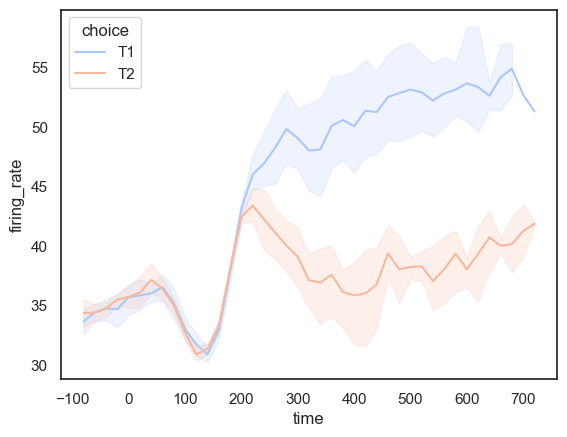

In [16]:
# Your code here
sns.lineplot(data=dots_stimulus, x='time', y='firing_rate', hue='choice')
plt.show()

What do you see? Describe the graph in words.

**Discuss with students**

How can we describe this in plain English? Imagine you are describing the graph to someone who can't see it!

After about 200ms the traces diverge

* On trials in which the preferred target of the cell is ultimately chosen, firing rate ramps up over time
* On trials in which the non-preferred target of the cell is ultimately chosen, firing rate ramps down over time

**c. Effect of task difficulty**

The difficulty of the task, and hence the time needed to reach a decision, depends on the *proportion of coherent motion* (ie what % of dots are moving to the right, or left, rather than randomly)

When only a smmall percentage of dots are moving coherently, the monkey needs to stare at the stimmulus for a long time to work out whether the dots are moving left or right.

Let's try breaking down the traces by level of coherence 

* <tt>coherence</tt> = % dots moving left (or right) rather than randomly 

You previously used `hue` (line colour) to break down the data by the <tt>choice</tt> (T1/T2). You can use `style` (different line styles) to further break down the data.

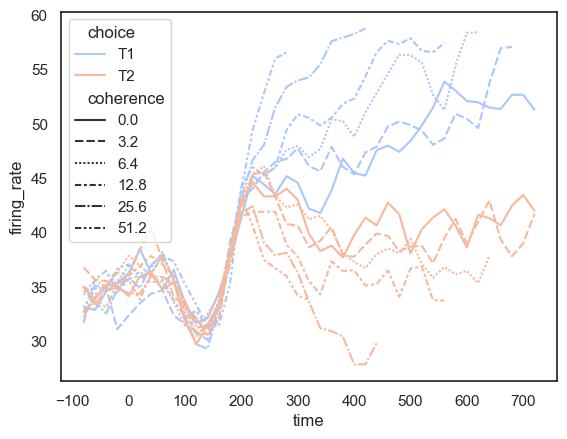

In [17]:
# Your code here
sns.lineplot(data=dots_stimulus, x='time', y='firing_rate', hue='choice', style='coherence')
plt.show()

**NOTE** the error bars have gone because there is only one trace for each coherence level x choice combination

Each trace is the average of many trials in the raw data

**d. Explore use of hue and style to best represent the data**

If you used <tt>hue = choice</tt> and <tt>style = coherence</tt> above, try switching these. 

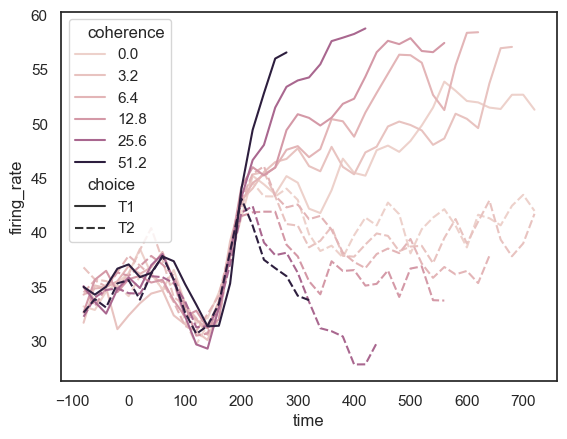

In [18]:
# Your code here
sns.lineplot(data=dots_stimulus, x='time', y='firing_rate', hue='coherence', style='choice')
plt.show()

* I think this plot shows the structure in the data much more clearly than the one in part c.
* What makes it clearer?
    * which is more striking - colour (hue) or linestyle (style)
    * which more clearly conveys an ordering (from low to high coherence) - colour or line style?

**Discuss with students:**

* Colour is more striking the line style, but in part c it was 'wasted' as the two colours were assigned to clearly separated groups of lines

* Line style in c is not ordered. Could you think of a way to make style ordered?
    * possible answers: styles defined by the size of dashes or thickness of lines)

* When would you need both colour and line style to convey order?
    * If both your categorical variables had more than two levels (in this case there are only two targets so any two different line styles are sufficient) and there was some meaningful order to those levels (as there is for coherence)

**e. Plot data aligned to response**

The traces for T1 trials all seem to end when the firing rate reaches about 60Hz - this happens earliest for high coherence trials.

The reason the traces end is because at this point, the monkey releases an eye movement.

Now let's plot the data aligned to the response, which we put in a separate dataframe way back at the start of this section. You can use the same plot style as in part d.

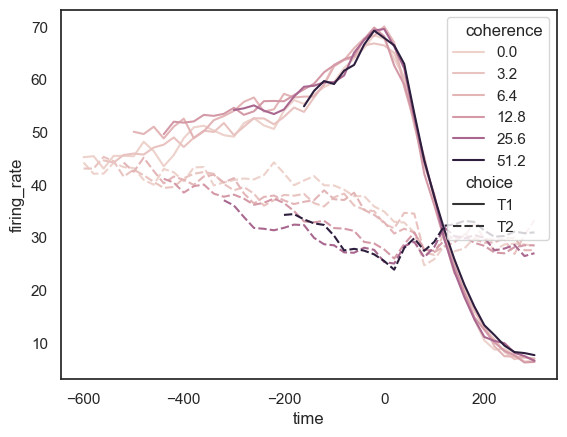

In [19]:
# Your code here
sns.lineplot(data=dots_response, x='time', y='firing_rate', hue='coherence', style='choice')
plt.show()

Focussing on trials in which <tt>choice == T1</tt>, we see:

* Aligining the data the the response brings the point at which each trace reaches threshold (60Hz firing rate) into line. 
* Now we see the trace for low-coherence trials stretches further back in time than those for short coherence trials (this is the effect is also seen in the stimulus-locked plot)

**f. Compare plots of stimulus- and response-locked data**

Let's use `plt.subplot()` to plot the stimulus and response-locked data.

* Would it be best to plot the data one above the other, or side by side? Why?
* Think about what needs to match between the axes to facilitate comparison
* Do you need to adjust the figure size to make enough space for bobth subplots?

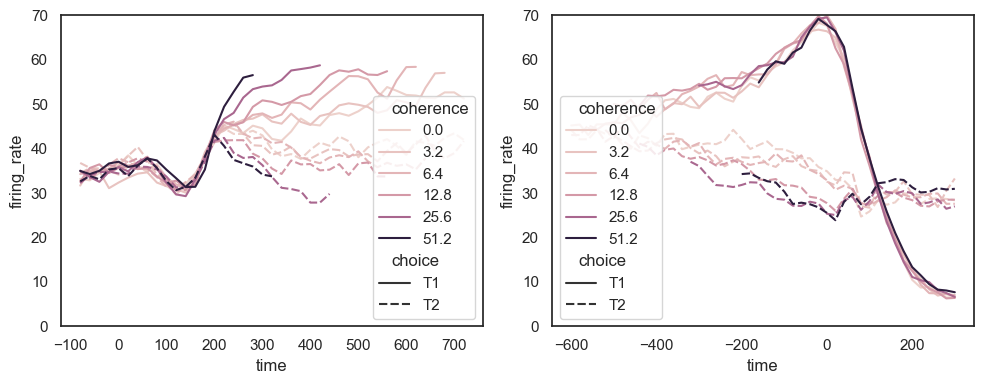

In [20]:
# Your code here
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.lineplot(data=dots_stimulus, x='time', y='firing_rate', hue='coherence', style='choice')
plt.ylim(0,70)

plt.subplot(1,2,2)
sns.lineplot(data=dots_response, x='time', y='firing_rate', hue='coherence', style='choice')
plt.ylim(0,70)

plt.tight_layout()
plt.show()

**Note-**

From the stimulus-locked graph, it looks like the neurons are ramping up to a threshold.

Paired with the response-locked graph, this result is extremely convincing. This is because of the aligned peaks and the sudden drop-off of firing rate after the threshold is reached.

**Aside-**

You might have noticed that the threshold/peak looks higher in the response-locked graph! 
This looks a bit odd. 

It is because the traces in the stimulus-locked graph are truncated 100ms before motion onset.
    * Check what the firing rate is at time -100ms in the response-locked graph (hopefully similar tho the traces' end-points in the stimulus-locked plot)

**Discuss with students**

Please discuss their plotting choices for the multi-panel figure as hinted at in the instructions!

You could ask them to write a short description in words of the effects seen in the graph.

If comfortable you can also discuss the data with them; if not they can look at the paper (linked at the top of this section)